In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import json
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [449]:
import statsmodels.api as sm

In [737]:
beauty = pd.read_csv('wards_beauty_score.csv')

In [740]:
flickr = pd.read_csv('Ward_Flicker_nature_tags.csv')

In [756]:
flickr[:4]

,Unnamed: 0,GSS_CODE,Total,Nature
0,0,E05000026,32748,519
1,1,E05000027,12155,1240
2,2,E05000028,4706,174
3,3,E05000029,6745,44


In [743]:
beauty['ward_name'] = beauty['ward_name'].apply(lambda x: x.replace(' Ward',''))

In [745]:
len(beauty)

627

In [746]:
beauty[:10]

,Unnamed: 0,ward_name,bscore
0,0,Chessington South,0.563107
1,1,Tolworth and Hook Rise,0.466667
2,2,Berrylands,0.741379
3,3,Alexandra,0.638554
4,4,Beverley,0.582278
5,5,Coombe Hill,0.503356
6,6,Chessington North and Hook,0.389610
7,7,Surbiton Hill,0.925373
8,8,Old Malden,0.675325
9,9,St. Mark's,0.745455


In [747]:
jsa = pd.read_csv('Claimant_Count_Model_2015.csv')
jsa.head()

,GSS_CODE,WDNAME,OACODE,All ages,All ages.1,All ages.2,Age 18-24,Age 25-44,Age 45-64,Age 18-24.1,Age 25-44.1,Age 45-64.1,Age 18-24.2,Age 25-44.2,Age 45-64.2
0,E05000026,Abbey,00ABFX,6724.0,4061.0,2663.0,612.0,4756.0,1356.0,319.0,2857.0,885.0,293.0,1899.0,471.0
1,E05000027,Alibon,00ABFY,4877.0,2559.0,2318.0,564.0,2587.0,1726.0,304.0,1336.0,919.0,260.0,1251.0,807.0
2,E05000028,Becontree,00ABFZ,6401.0,3439.0,2962.0,731.0,3734.0,1936.0,383.0,2001.0,1055.0,348.0,1733.0,881.0
3,E05000029,Chadwell Heath,00ABGA,4577.0,2414.0,2163.0,579.0,2291.0,1707.0,299.0,1220.0,895.0,280.0,1071.0,812.0
4,E05000030,Eastbrook,00ABGB,5259.0,2796.0,2463.0,793.0,2358.0,2108.0,430.0,1261.0,1105.0,363.0,1097.0,1003.0


In [748]:
len(jsa)

681

In [749]:
beauty_merged = pd.merge(jsa , beauty , left_on='WDNAME' , right_on='ward_name')

In [751]:
len(beauty_merged)

605

In [752]:
jsa_merged = pd.merge(beauty_merged , flickr , left_on='GSS_CODE' , right_on='GSS_CODE')

In [754]:
len(jsa_merged)

554

In [825]:
income = pd.read_csv('modelled-household-income-estimates-wards.csv', engine='python')
for column in income.columns: 
    income[column] =  income[column].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    income[column] =  income[column].apply(lambda x: x.replace(',',''))
merged_socio = pd.merge(income,jsa_merged,left_on='Code' , right_on='GSS_CODE')
selected_socio = merged_socio[['GSS_CODE','All ages','Median 2012/13' , 'bscore' , 'Total' , 'Nature']]
selected_socio = selected_socio.rename(columns={'All ages':'All_jsa'})

In [826]:
len(selected_socio)

554

In [827]:
selected_socio.head()

,GSS_CODE,All_jsa,Median 2012/13,bscore,Total,Nature
0,E05000026,6724.0,33920,0.616279,32748,519
1,E05000027,4877.0,32470,0.319149,12155,1240
2,E05000028,6401.0,33000,0.560606,4706,174
3,E05000029,4577.0,33920,0.390244,6745,44
4,E05000030,5259.0,37400,0.426230,72372,949


In [828]:
Ward_IMD = json.load(open('Ward_index_deprivation.json'))

ward = {'GSS_CODE': [] , 'IMD' : []}
for k in Ward_IMD:
    ward['GSS_CODE'].append(k)
    ward['IMD'].append(Ward_IMD[k])
wardDf = pd.DataFrame.from_dict(ward)

theData = pd.read_csv('Merged_all_disease_green_sat.csv')

In [829]:
data_1 = pd.merge(theData,wardDf,left_on='GSS_CODE' , right_on='GSS_CODE')

In [830]:
data = pd.merge(data_1,selected_socio,left_on='GSS_CODE' , right_on='GSS_CODE')

In [831]:
len(data)

414

In [832]:
data['All_jsa'] = data['All_jsa']/data['population']
data['Sex_ratio'] = data['male']/data['female']
data['Flickr_score'] = data['Nature']/data['Total']

In [833]:
list(data.columns)

['Unnamed: 0',
 'green_score',
 'GSS_CODE',
 'tree_pixels',
 'grass_pixels',
 'urban_pixels',
 'npix',
 'tree_pct',
 'grass_pct',
 'urban_pct',
 'borough_name_x',
 'TreePixelDensity',
 'TreeDensity',
 'psoriasis_Prescriptions',
 'psoriasis_Prevalence',
 "Meniere's disease_Prescriptions",
 "Meniere's disease_Prevalence",
 "crohn's disease_Prescriptions",
 "crohn's disease_Prevalence",
 'gastroparesis_Prescriptions',
 'gastroparesis_Prevalence',
 'irritable bowel syndrome_Prescriptions',
 'irritable bowel syndrome_Prevalence',
 'parkinson_Prescriptions',
 'parkinson_Prevalence',
 'sleep apnea_Prescriptions',
 'sleep apnea_Prevalence',
 'interstitial cystitis_Prescriptions',
 'interstitial cystitis_Prevalence',
 'bipolar_Prescriptions',
 'bipolar_Prevalence',
 'hypothyroidism_Prescriptions',
 'hypothyroidism_Prevalence',
 'dementia_Prescriptions',
 'dementia_Prevalence',
 'rheumatoid_Prescriptions',
 'rheumatoid_Prevalence',
 'depression_Prescriptions',
 'depression_Prevalence',
 'diabete

In [881]:
socio_economic = ['avg_age', 'IMD','people_per_sq_km' ,'Sex_ratio','All_jsa','Median 2012/13']
nutrient = ['weight','h_nutrients_weight_norm','h_nutrients_calories_norm']
green = ['TreePixelDensity','GLUD_Area of Greenspace PCT']
Flickr = ['Flickr_score']
beauty = ['bscore']

# X_dims = ['avg_age', 'IMD','people_per_sq_km' ,'Sex_ratio','weight','num_transactions','All_jsa','Mean 2012/13']
X_dims =  socio_economic + nutrient  + Flickr + beauty
X_dims_2 = socio_economic + nutrient + green +  Flickr + beauty

print(X_dims , X_dims_2)
Y_dims = ['depression_Prevalence']
tree_dims = ['TreePixelDensity','TreeDensity','LCM_tree_pct','GLUD_Area of Greenspace PCT']

X = np.array(data[X_dims].values,dtype=np.float32)
X_2= np.array(data[X_dims_2].values,dtype=np.float32)
Y = np.array(data[Y_dims].values,dtype=np.float32)

X_prime = np.array(data[tree_dims].values,dtype=np.float32)
min_max_scaler = preprocessing.MinMaxScaler() #StandardScaler() #MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X2 = min_max_scaler.fit_transform(X_2)
Y = min_max_scaler.fit_transform(Y)

['avg_age', 'IMD', 'people_per_sq_km', 'Sex_ratio', 'All_jsa', 'Median 2012/13', 'weight', 'h_nutrients_weight_norm', 'h_nutrients_calories_norm', 'Flickr_score', 'bscore'] ['avg_age', 'IMD', 'people_per_sq_km', 'Sex_ratio', 'All_jsa', 'Median 2012/13', 'weight', 'h_nutrients_weight_norm', 'h_nutrients_calories_norm', 'TreePixelDensity', 'GLUD_Area of Greenspace PCT', 'Flickr_score', 'bscore']


In [882]:
X = sm.add_constant(X)
X2 = sm.add_constant(X2)

In [883]:
X.shape

(414, 12)

In [884]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [885]:
model_2 = sm.OLS(Y, X2).fit()
predictions_2 = model_2.predict(X2)

In [886]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     16.08
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           3.55e-26
Time:                        15:03:21   Log-Likelihood:                 293.35
No. Observations:                 414   AIC:                            -562.7
Df Residuals:                     402   BIC:                            -514.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4585      0.064      7.141      0.000       0.332       0.585
x1             0.0973      0.047      2.085      0.038       0.006       0.189
x2            -0.0744      0.050     -1.479      0.140      -0.173       0.025
x3             0.0773      0.064      1.202      0.230      -0.049       0.204
x4            -0.2271      0.058     -3.912      0.000      -0.341      -0.113
x5             0.0503      0.053      0.957      0.339      -0.053       0.154
x6            -0.2627      0.088     -2.984      0.003      -0.436      -0.090
x7            -0.2919      0.040     -7.295      0.000      -0.371      -0.213
x8             0.1170      0.093      1.260      0.209      -0.066       0.300
x9            -0.0641      0.108     -0.591      0.555      -0.277       0.149
x10            0.0988      0.057      1.721      0.086      -0.014       0.212
x11            0.0849      0.034      2.467      0.014       0.017       0.153
==============================================================================
Omnibus:                       17.232   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.344
Skew:                           0.410   Prob(JB):                     3.82e-05
Kurtosis:                       3.711   Cond. No.                         42.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [887]:
X_dims_2

['avg_age',
 'IMD',
 'people_per_sq_km',
 'Sex_ratio',
 'All_jsa',
 'Median 2012/13',
 'weight',
 'h_nutrients_weight_norm',
 'h_nutrients_calories_norm',
 'TreePixelDensity',
 'GLUD_Area of Greenspace PCT',
 'Flickr_score',
 'bscore']

In [888]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     14.26
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           2.75e-26
Time:                        15:03:25   Log-Likelihood:                 296.70
No. Observations:                 414   AIC:                            -565.4
Df Residuals:                     400   BIC:                            -509.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4393      0.065      6.745      0.000       0.311       0.567
x1             0.1034      0.047      2.198      0.029       0.011       0.196
x2            -0.1378      0.089     -1.544      0.123      -0.313       0.038
x3             0.0501      0.065      0.772      0.440      -0.077       0.178
x4            -0.2158      0.058     -3.723      0.000      -0.330      -0.102
x5             0.0694      0.053      1.312      0.190      -0.035       0.173
x6            -0.2379      0.089     -2.673      0.008      -0.413      -0.063
x7            -0.2750      0.040     -6.812      0.000      -0.354      -0.196
x8             0.1083      0.092      1.171      0.242      -0.073       0.290
x9            -0.0888      0.108     -0.819      0.413      -0.302       0.124
x10            0.1082      0.049      2.198      0.029       0.011       0.205
x11            0.1018      0.078      1.313      0.190      -0.051       0.254
x12            0.0974      0.059      1.656      0.098      -0.018       0.213
x13            0.0417      0.038      1.084      0.279      -0.034       0.117
==============================================================================
Omnibus:                       15.134   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.262
Skew:                           0.362   Prob(JB):                     0.000108
Kurtosis:                       3.731   Cond. No.                         43.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [889]:
np.corrcoef(predictions_2,Y[:,0])

array([[1.        , 0.56274795],
       [0.56274795, 1.        ]])

/work/sagarj/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


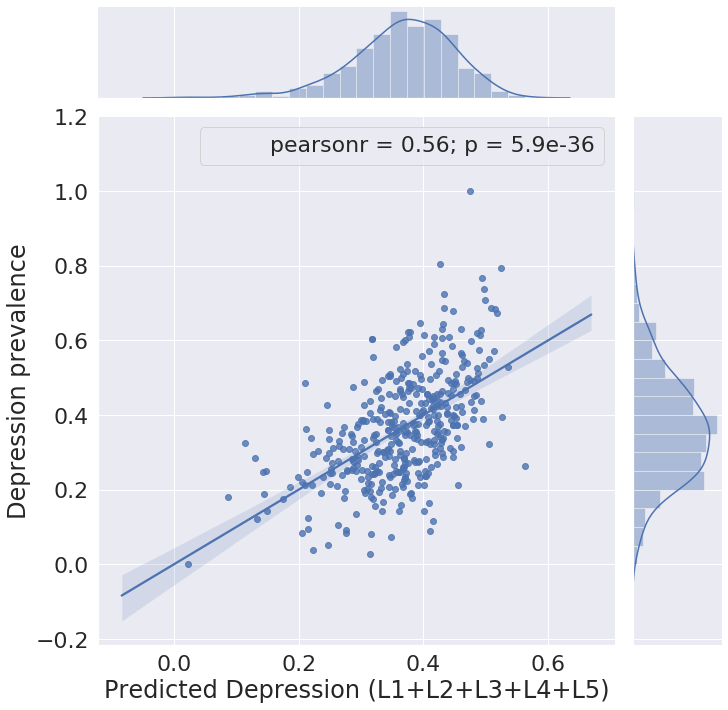

In [890]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=predictions_2, y=Y[:,0], kind='regression',height=10);
plt.xlabel('Predicted Depression (L1+L2+L3+L4+L5)')
plt.ylabel('Depression prevalence')
ax.annotate(pearsonr)

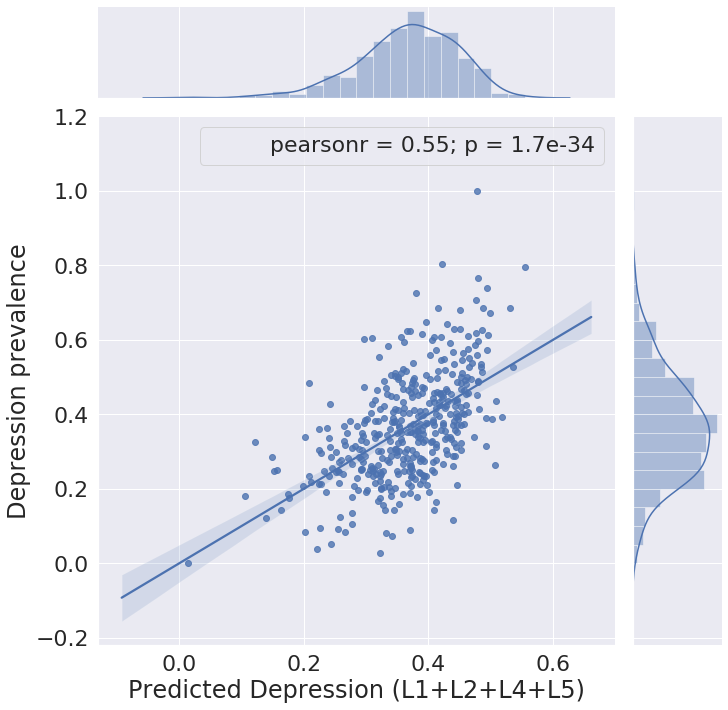

In [891]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=predictions, y=Y[:,0], kind='regression',height=10);
plt.xlabel('Predicted Depression (L1+L2+L4+L5)')
plt.ylabel('Depression prevalence')
ax.annotate(pearsonr)

In [893]:
residuals_with_green = np.array([predictions_2[k] - Y[k,0] for k in range(len(predictions_2))] , dtype = np.float32)

In [894]:
residuals_without_green = np.array([predictions[k] - Y[k,0] for k in range(len(predictions))] , dtype = np.float32)

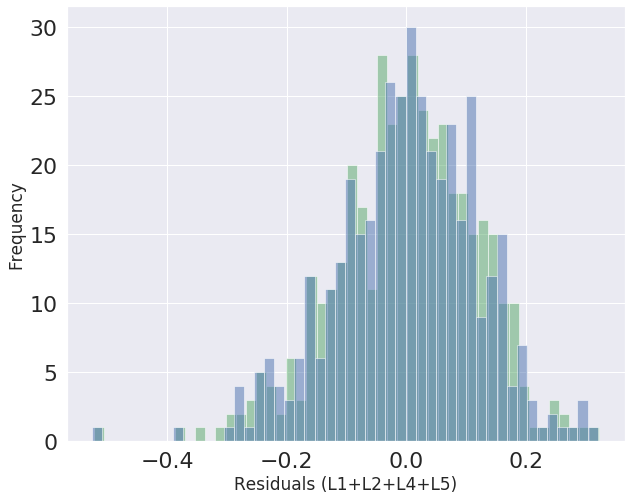

In [898]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.ylabel('Frequency',fontsize=17)
plt.xlabel('Residuals (L1+L2+L4+L5)',fontsize=17)
n1 , bins1 , patches1 = plt.hist(residuals_without_green, 50, facecolor='g', alpha=0.5)
n2 , bins2 , patches2 = plt.hist(residuals_with_green, 50, facecolor='b', alpha=0.5)
# n2 , bins2 , patches2 = plt.hist(Y[:,0], 50, facecolor='r', alpha=0.75)
plt.show()

In [901]:
results_df = {'GSS_CODE':[] , 'Normalized_depression' :[] ,'Predict_L1':[] , 'Predict_L2':[] , 'Residual_L1':[]}
for index, row in data.iterrows():
    results_df['GSS_CODE'].append(row['GSS_CODE'])
    results_df['Normalized_depression'].append(Y[index][0])
    results_df['Predict_L1'].append(predictions[index])
    results_df['Predict_L2'].append(predictions_2[index])
    results_df['Residual_L1'].append(residuals_without_green[index])
results = pd.DataFrame.from_dict(results_df)
results.head()

,GSS_CODE,Normalized_depression,Predict_L1,Predict_L2,Residual_L1
0,E05000420,0.381794,0.319267,0.329966,-0.062526
1,E05000571,0.492230,0.458658,0.450699,-0.033573
2,E05000570,0.794825,0.555045,0.525154,-0.239780
3,E05000572,0.304906,0.428526,0.419319,0.123621
4,E05000620,0.446438,0.348623,0.332799,-0.097816


In [902]:
green = np.array(X_prime[:,0],dtype = np.float32)

In [904]:
green.shape, residuals_with_green.shape

((414,), (414,))

In [811]:
r = np.corrcoef(residuals, green)
print(r )

[[ 1.         -0.07543809]
 [-0.07543809  1.        ]]


/work/sagarj/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


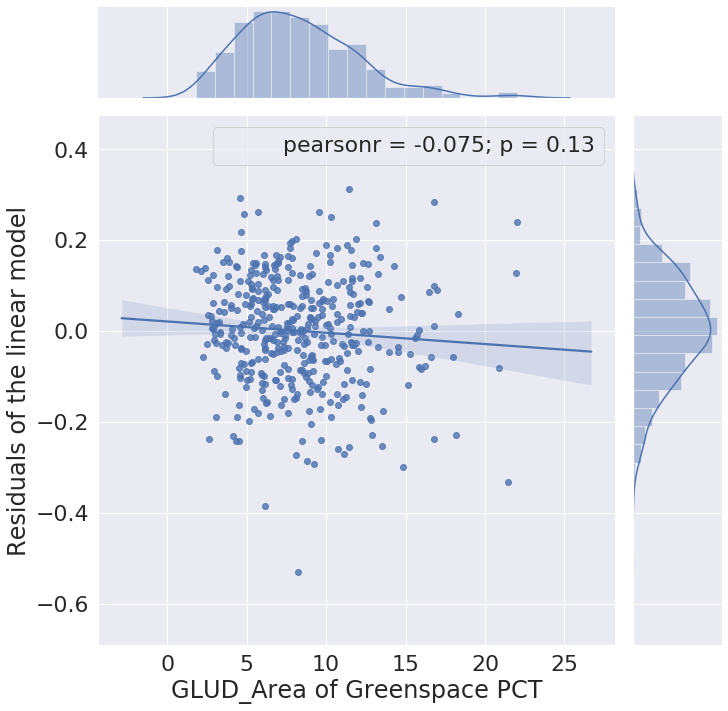

In [905]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=green, y=residuals, kind='regression',height=10);
plt.xlabel('GLUD_Area of Greenspace PCT')
plt.ylabel('Residuals of the linear model')
ax.annotate(pearsonr)

In [906]:
from sklearn import linear_model

In [907]:
df = data[X_dims_2]

In [908]:
df.head()

,avg_age,IMD,people_per_sq_km,Sex_ratio,All_jsa,Median 2012/13,weight,h_nutrients_weight_norm,h_nutrients_calories_norm,TreePixelDensity,GLUD_Area of Greenspace PCT,Flickr_score,bscore
0,33.195192,8.91957,14246.666667,0.983525,0.557674,32220,440.669488,0.712779,0.675817,10.878568,0.142967,0.002488,0.617978
1,34.208704,41.70052,5918.048780,0.933078,0.530168,32330,303.275663,0.707125,0.671743,7.598941,0.391747,0.011122,0.697674
2,40.219281,18.26981,6259.883721,0.909381,0.509148,37960,281.894402,0.705212,0.669696,8.460213,0.112290,0.017603,0.872727
3,37.033810,27.56138,6597.948718,0.966677,0.510026,40610,278.329061,0.697350,0.670163,5.271470,0.254884,0.009760,0.500000
4,35.017963,41.44914,6087.197232,0.951631,0.618008,39580,372.607669,0.729214,0.689372,5.235384,0.273367,0.015287,0.474820


In [909]:
len(df)

414

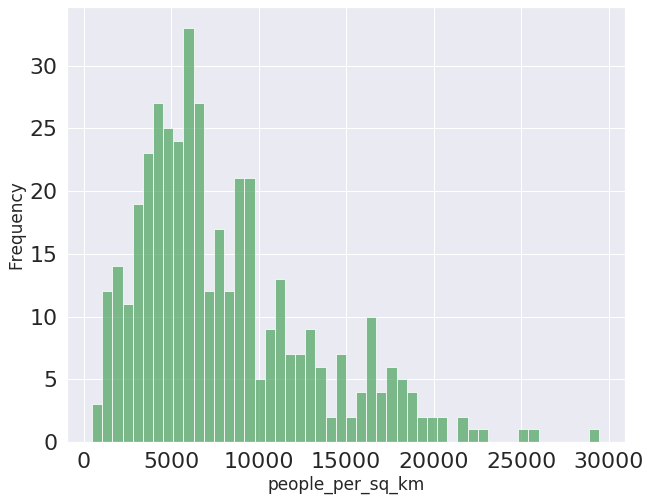

In [910]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.ylabel('Frequency',fontsize=17)
plt.xlabel('people_per_sq_km',fontsize=17)
n, bins, patches = plt.hist(df['people_per_sq_km'].values, 50, facecolor='g', alpha=0.75)
plt.show()

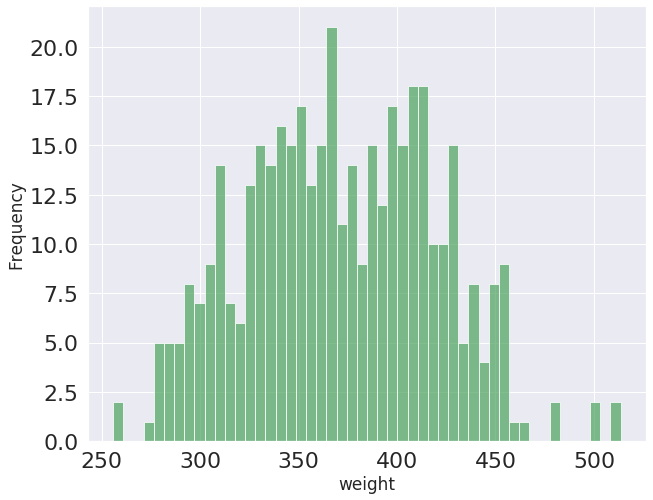

In [911]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.ylabel('Frequency',fontsize=17)
plt.xlabel('weight',fontsize=17)
n, bins, patches = plt.hist(df['weight'].values, 50, facecolor='g', alpha=0.75)
plt.show()

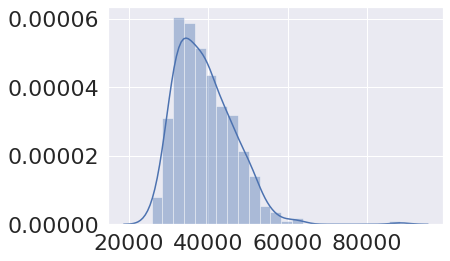

In [1027]:
sns.distplot(np.array(df['Median 2012/13'].values , dtype=np.float32))

In [1041]:
import statsmodels.api as sm
X_dims =  ['GLUD_Area of Greenspace PCT']
Y_dims = ['TreePixelDensity']


X = np.array(data[X_dims].values,dtype=np.float32)
Y = np.array(data[Y_dims].values,dtype=np.float32)
min_max_scaler = preprocessing.MinMaxScaler() #StandardScaler() #MinMaxScaler()
X = min_max_scaler.fit_transform(X)
Y = min_max_scaler.fit_transform(Y)
X = sm.add_constant(X)

In [1042]:
wards= data[['GSS_CODE','LCM_tree_pct','GLUD_Area of Greenspace PCT','TreePixelDensity']]

In [1043]:
wards

,GSS_CODE,LCM_tree_pct,GLUD_Area of Greenspace PCT,TreePixelDensity
0,E05000420,0.000000,0.142967,10.878568
1,E05000571,0.030845,0.391747,7.598941
2,E05000570,0.007533,0.112290,8.460213
3,E05000572,0.015136,0.254884,5.271470
4,E05000620,0.014513,0.273367,5.235384
...,...,...,...,...
409,E05000257,0.002592,0.102392,6.113550
410,E05000314,0.053543,0.532996,3.851674
411,E05000438,0.012964,0.352056,18.012341
412,E05000439,0.023893,0.147625,11.900157


In [1044]:
model_green = sm.OLS(Y, X).fit()
predictions_GSV_sat = model_green.predict(X)

In [1045]:
model_green.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     103.4
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           8.19e-22
Time:                        17:39:29   Log-Likelihood:                 170.80
No. Observations:                 414   AIC:                            -337.6
Df Residuals:                     412   BIC:                            -329.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4455      0.015     30.383      0.000       0.417       0.474
x1            -0.3936      0.039    -10.167      0.000      -0.470      -0.317
==============================================================================
Omnibus:                       48.727   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.919
Skew:                           0.704   Prob(JB):                     1.34e-19
Kurtosis:                       4.748   Cond. No.                         5.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1046]:
np

<module 'numpy' from '/work/sagarj/miniconda3/lib/python3.7/site-packages/numpy/__init__.py'>

In [977]:
Y.shape

(414, 1)

/work/sagarj/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


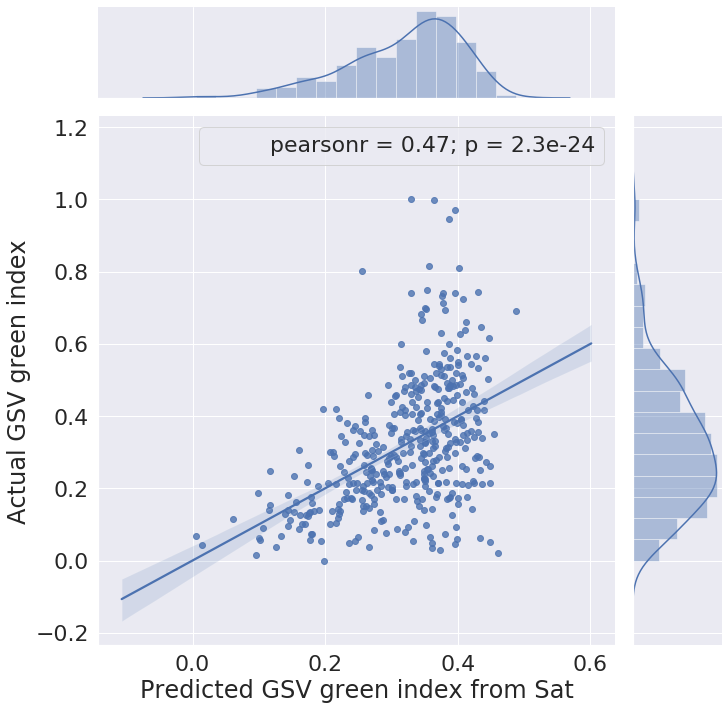

In [978]:

sns.set(font_scale=2) 
ax = sns.jointplot(x=predictions_GSV_sat, y=Y[:,0], kind='regression',height=10);
plt.xlabel('Predicted GSV green index from Sat')
plt.ylabel('Actual GSV green index')
ax.annotate(pearsonr)


In [979]:
residuals_sat = np.array([predictions_GSV_sat[k] - Y[k,0] for k in range(len(predictions_GSV_sat))] , dtype = np.float32)

In [980]:
wards['residuals'] = residuals_sat

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [981]:
wards['predicted'] = predictions_GSV_sat

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [982]:
wards['actual_scaled'] = (wards['TreePixelDensity']-df['TreePixelDensity'].min())/(df['TreePixelDensity'].max()-df['TreePixelDensity'].min())

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [983]:
wards

,GSS_CODE,LCM_tree_pct,GLUD_Area of Greenspace PCT,TreePixelDensity,residuals,predicted,actual_scaled
0,E05000420,0.000000,0.142967,10.878568,-0.068895,0.379897,0.448792
1,E05000571,0.030845,0.391747,7.598941,-0.045221,0.241341,0.286562
2,E05000570,0.007533,0.112290,8.460213,0.074411,0.403576,0.329165
3,E05000572,0.015136,0.254884,5.271470,0.146867,0.318299,0.171431
4,E05000620,0.014513,0.273367,5.235384,0.136663,0.306310,0.169646
...,...,...,...,...,...,...,...
409,E05000257,0.002592,0.102392,6.113550,0.193843,0.406929,0.213086
410,E05000314,0.053543,0.532996,3.851674,0.064489,0.165689,0.101200
411,E05000438,0.012964,0.352056,18.012341,-0.545762,0.255909,0.801670
412,E05000439,0.023893,0.147625,11.900157,-0.108462,0.390863,0.499325


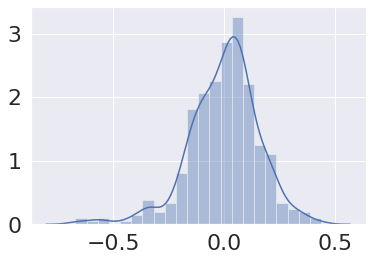

In [984]:
sns.distplot(residuals_sat)

In [985]:
wards['residual_quart'] = pd.qcut(wards['residuals'], q=4, precision=0)

/work/sagarj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [986]:
wards['residual_quart'].unique()

[(-0.09, 0.02], (0.02, 0.1], (0.1, 0.4], (-0.7999999999999999, -0.09]]
Categories (4, interval[float64]): [(-0.7999999999999999, -0.09] < (-0.09, 0.02] < (0.02, 0.1] < (0.1, 0.4]]

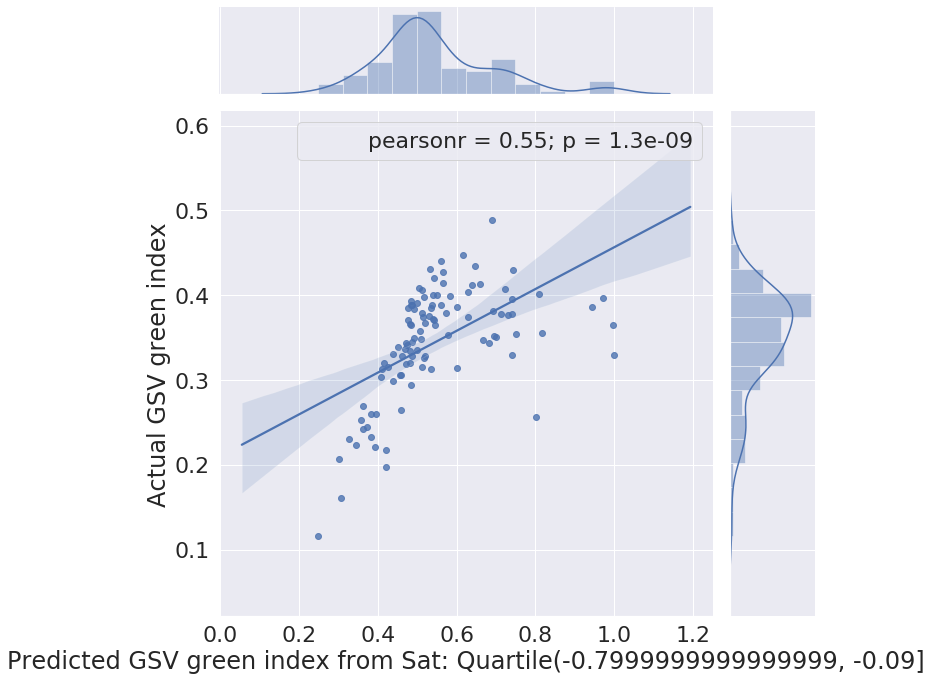

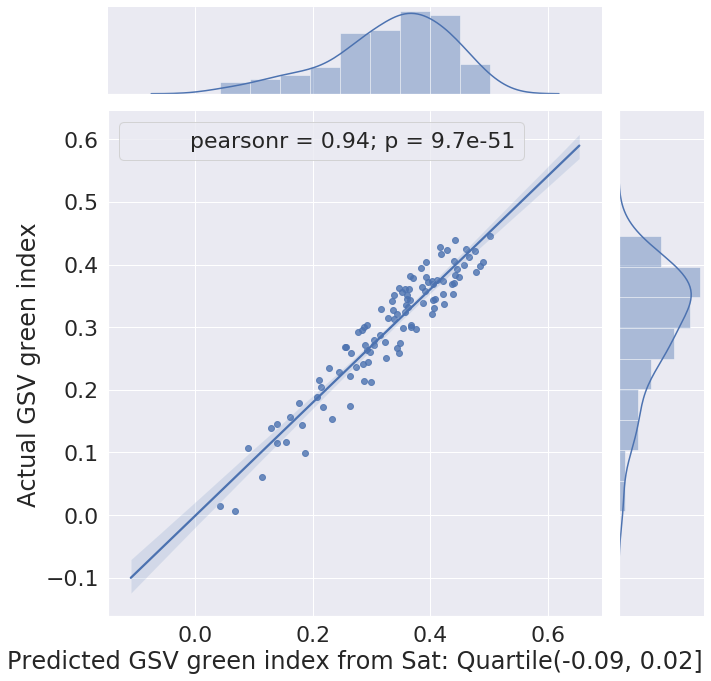

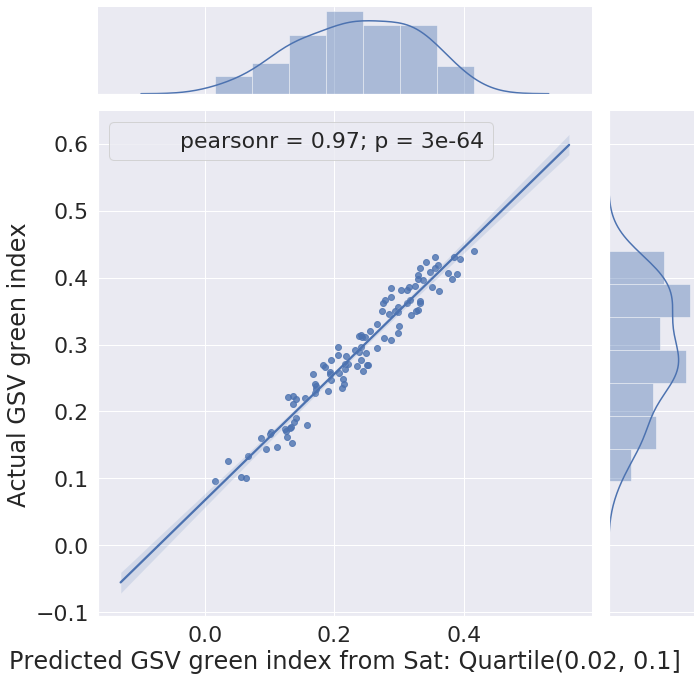

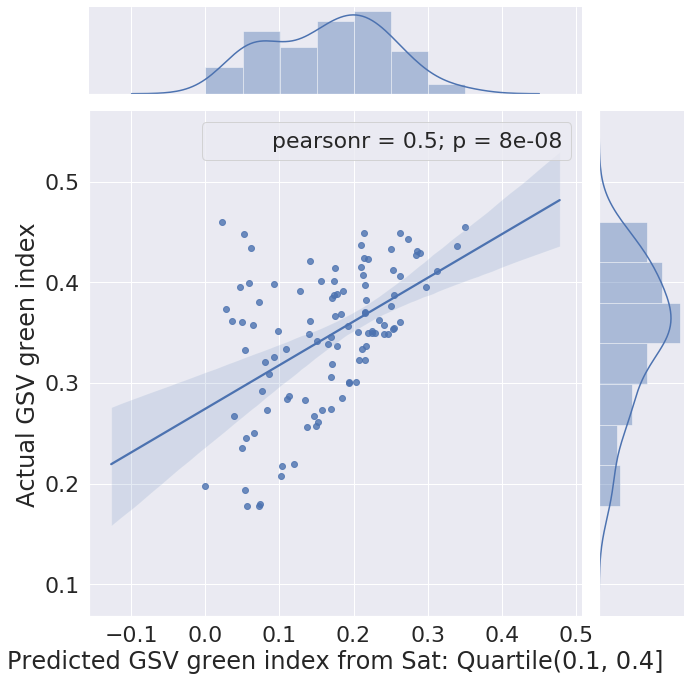

In [987]:
for name , group in wards.groupby('residual_quart'):
    sns.set(font_scale=2) 
    ax = sns.jointplot(x=group['actual_scaled'], y=group['predicted'], kind='regression',height=10);
    plt.xlabel('Predicted GSV green index from Sat: Quartile' + str(name))
    plt.ylabel('Actual GSV green index')
    ax.annotate(pearsonr)


In [988]:
import geopandas as gpd

In [993]:
wards_shape = gpd.read_file('../Data/Geo_Data/geo/london_wards.shp')

In [994]:
wards_shape.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,Chessington South Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,52,733,50840,10884,E05000405,755.173,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
1,Tolworth and Hook Rise Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,106,734,117160,11407,E05000414,259.464,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.30846 51.37586, -0.30834 51.37606..."
2,Berrylands Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,107,735,50449,11413,E05000401,145.390,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.30385 51.39249, -0.30375 51.39252..."
3,Alexandra Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,108,736,50456,11420,E05000400,268.506,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.26990 51.38845, -0.26975 51.38838..."
4,Beverley Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,109,737,117161,11417,E05000402,187.821,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.24662 51.39921, -0.24672 51.39921..."


In [1011]:
wards_with_data = pd.merge(wards_shape , wards , left_on='CODE', right_on = 'GSS_CODE')

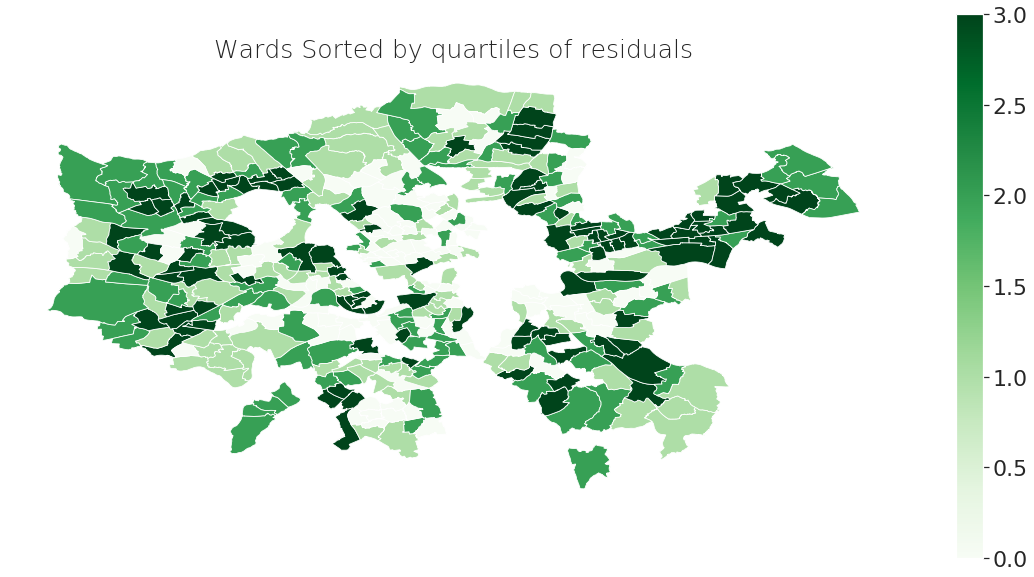

In [1021]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('Wards Sorted by quartiles of residuals', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=3))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
wards_with_data.plot(ax=ax,column='residual_quart', cmap='Greens', linewidth=0.8)

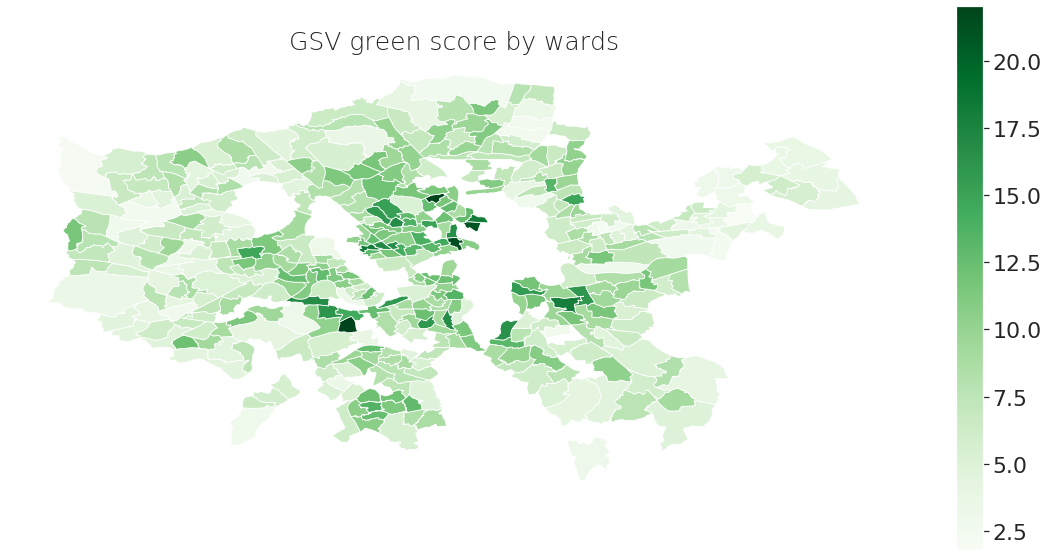

In [1022]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('GSV green score by wards', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=wards_with_data['TreePixelDensity'].min(), vmax=wards_with_data['TreePixelDensity'].max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
wards_with_data.plot(ax=ax,column='TreePixelDensity', cmap='Greens', linewidth=0.8)

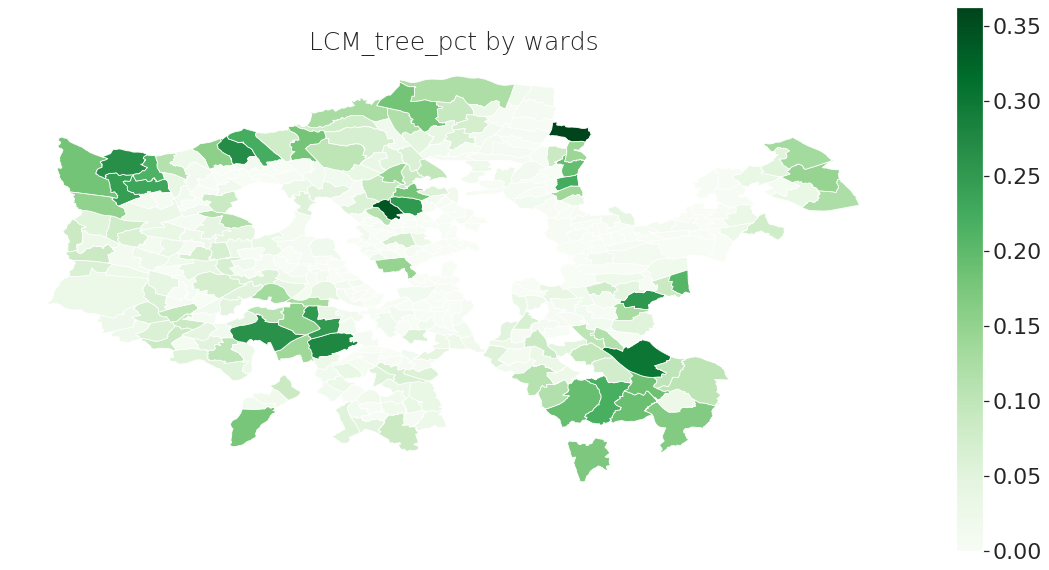

In [1023]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('LCM_tree_pct by wards', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=wards_with_data['LCM_tree_pct'].min(), vmax=wards_with_data['LCM_tree_pct'].max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
wards_with_data.plot(ax=ax,column='LCM_tree_pct', cmap='Greens', linewidth=0.8)

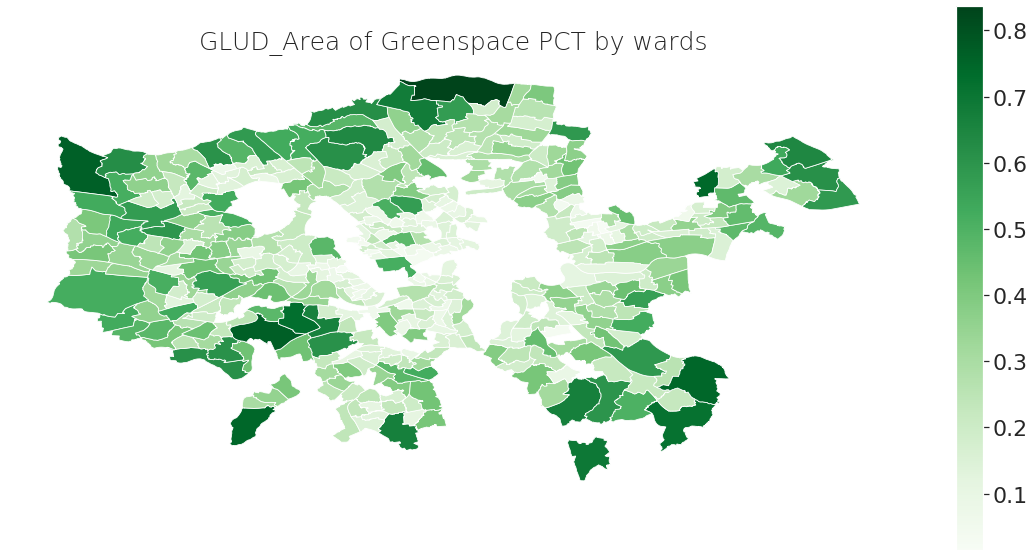

In [1024]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('GLUD_Area of Greenspace PCT by wards', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=wards_with_data['GLUD_Area of Greenspace PCT'].min(), vmax=wards_with_data['GLUD_Area of Greenspace PCT'].max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
wards_with_data.plot(ax=ax,column='GLUD_Area of Greenspace PCT', cmap='Greens', linewidth=0.8)

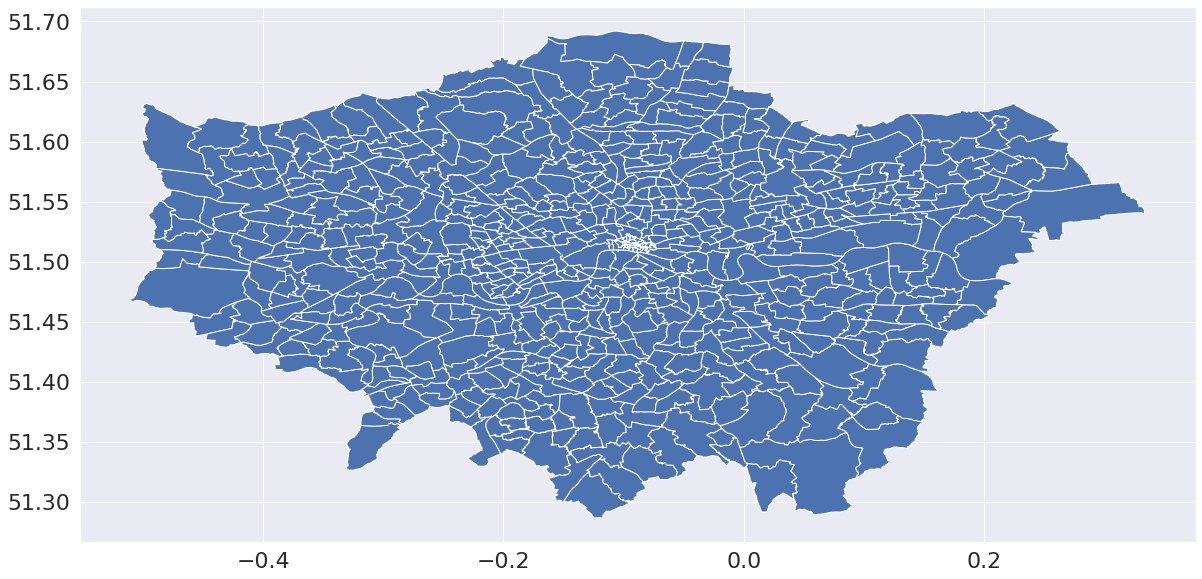

In [1002]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
wards_shape.plot(ax=ax)